In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
wine = pd.read_csv('../datasets/winequality-white.csv', sep=';')
# wine = pd.read_csv('../datasets/winequality-red.csv', sep=';')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


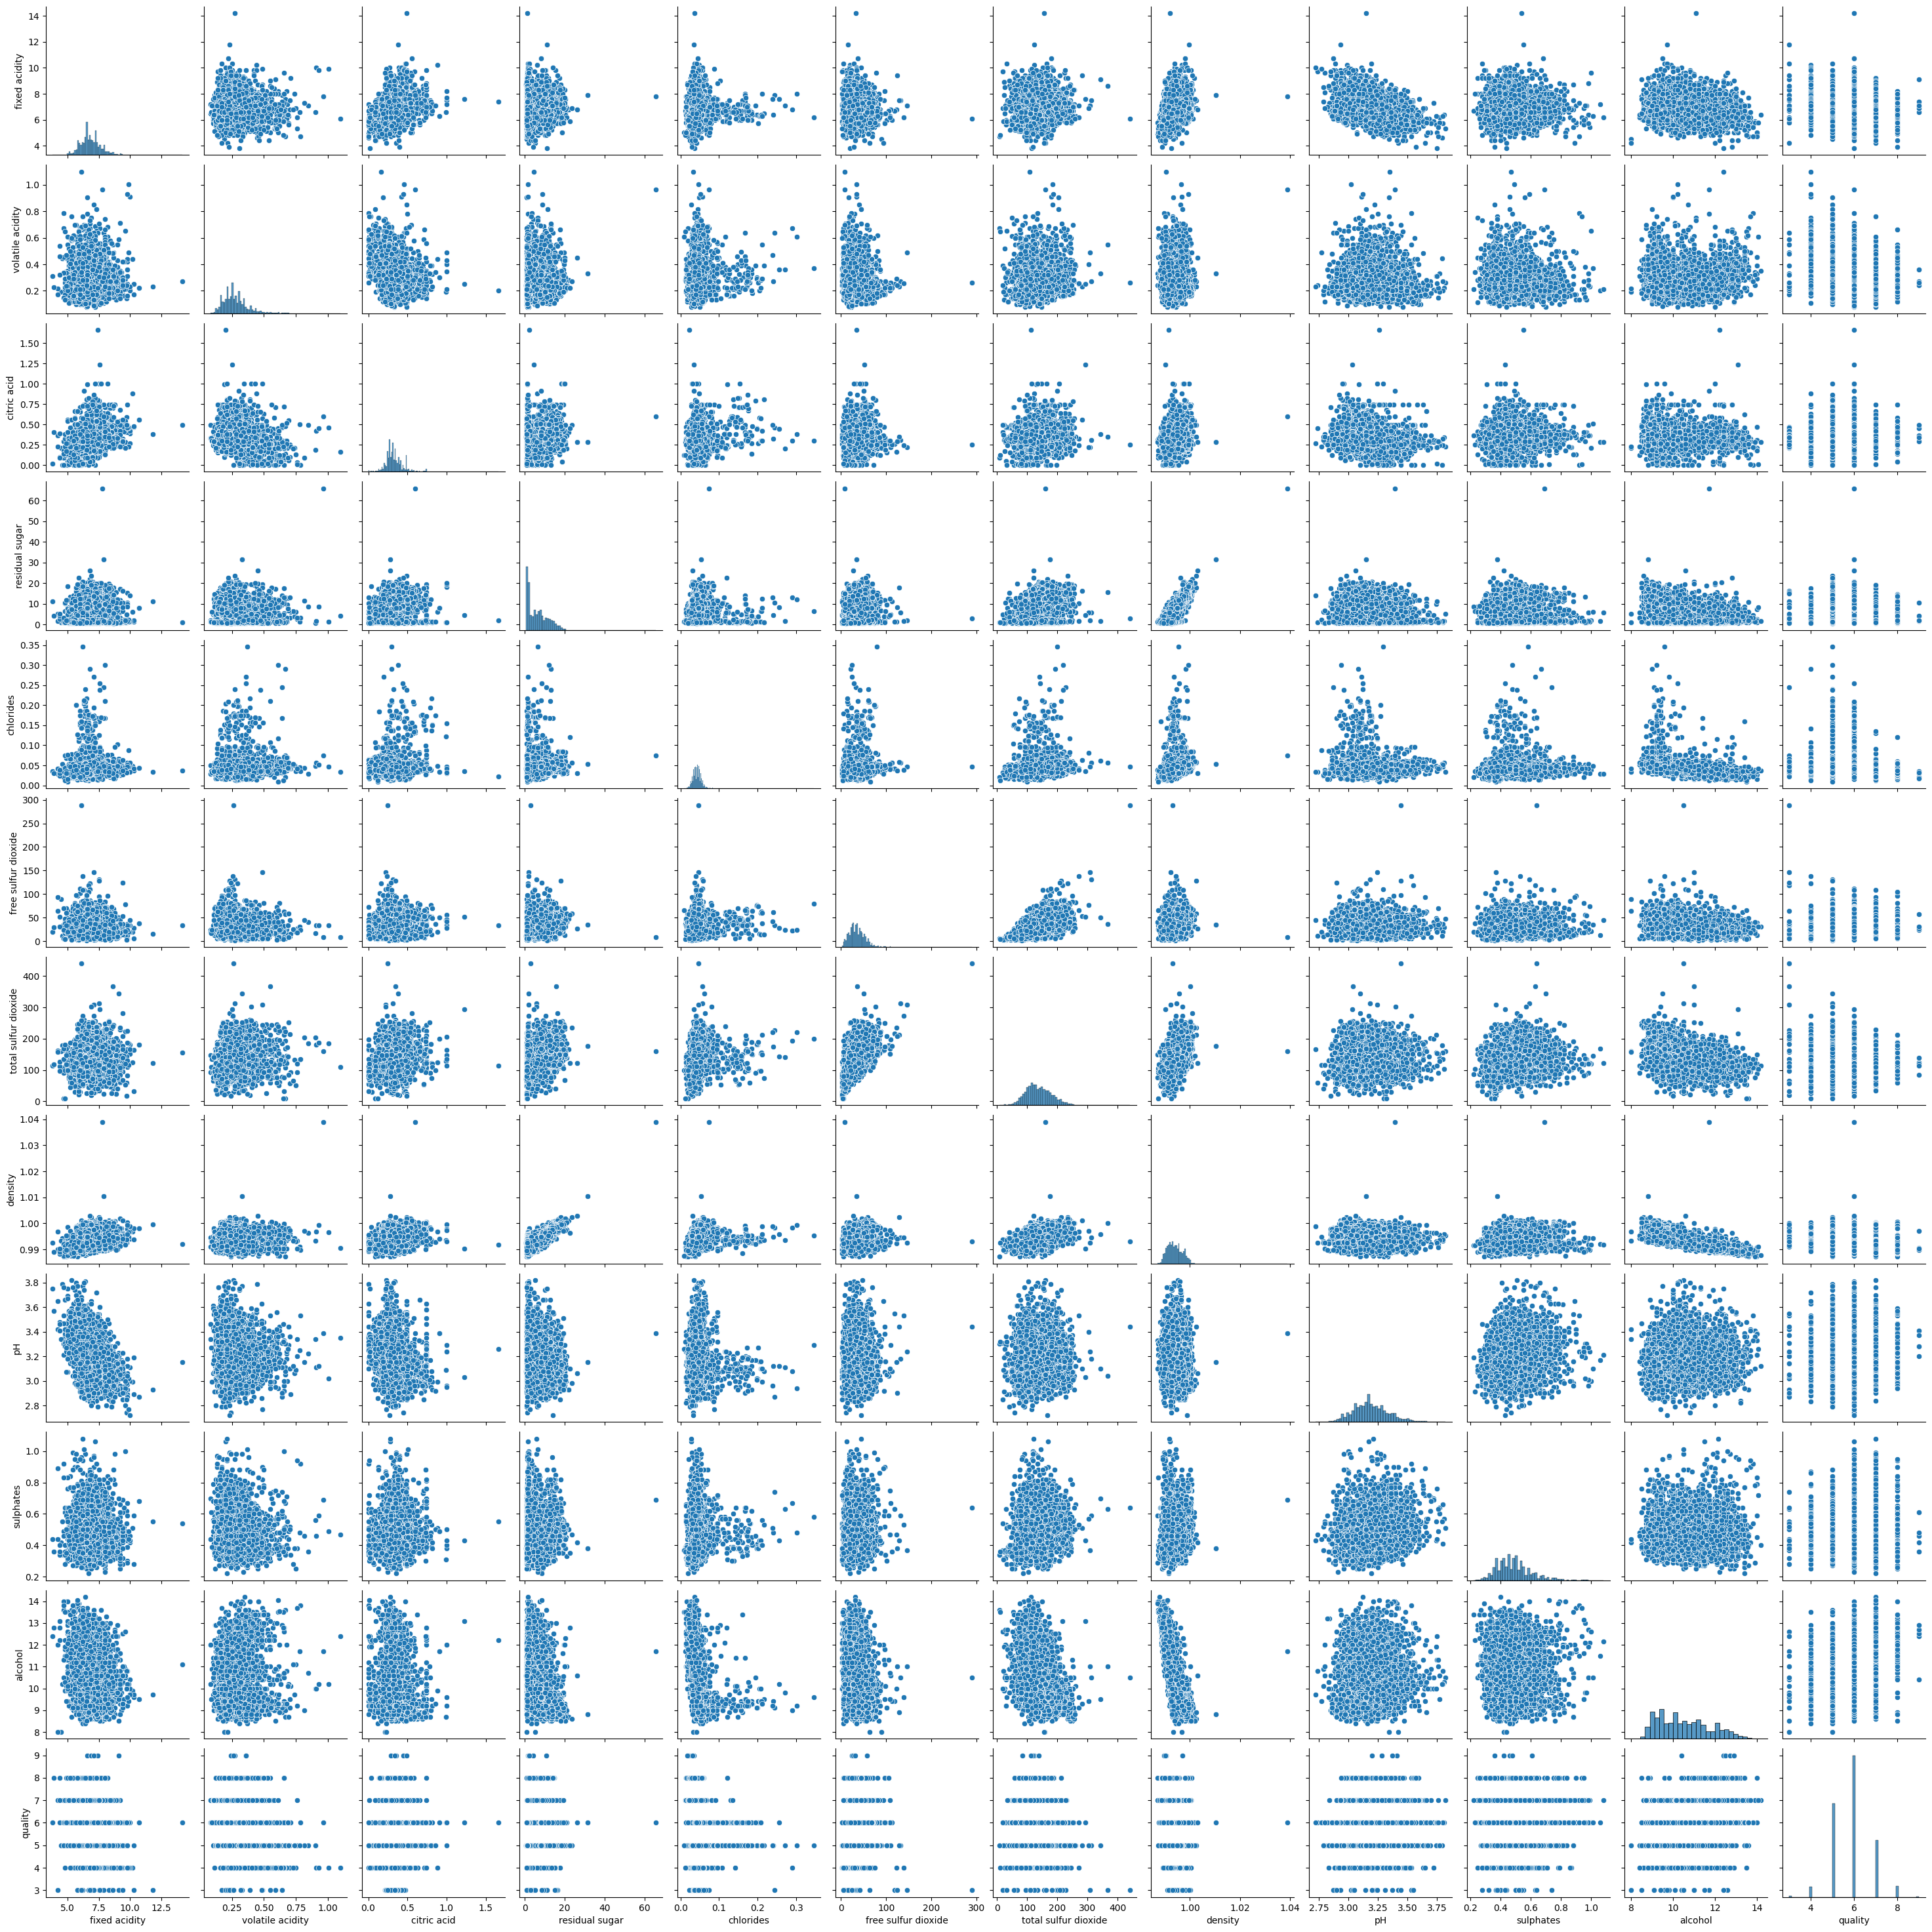

In [4]:
sns.pairplot(wine, kind='scatter')

### Porównanie kwanrtyli
Z głównego zbioru wyznaczono podzbiory:  
* dolne 25% win
* górne 25% win  

względem oceny jakości. Celem jest znalezienie średnich wartości cech, które znacząco różnią się dla obu tych podzbiorów. Mogłoby to świadczyć o większej wadze tych cech w modelu regresji.

In [5]:
sumtotal = wine.shape[0]

wine_q1 = wine.nsmallest(sumtotal // 4, 'quality')
wine_q1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.00000,1224.000000,1224.000000,1224.000000
mean,7.064624,0.311552,0.342574,7.001144,0.050723,34.726716,148.757353,0.995309,3.17652,0.477377,9.816462,4.834150
std,0.914109,0.120081,0.148325,5.322166,0.027107,20.896610,48.972679,0.002555,0.14997,0.104625,0.870875,0.413719
min,4.200000,0.100000,0.000000,0.600000,0.013000,3.000000,10.000000,0.988760,2.79000,0.250000,8.000000,3.000000
25%,6.400000,0.240000,0.250000,1.700000,0.039750,19.000000,116.000000,0.993372,3.08000,0.400000,9.200000,5.000000
50%,6.900000,0.280000,0.320000,6.500000,0.046000,33.000000,150.000000,0.995300,3.16000,0.460000,9.600000,5.000000
75%,7.600000,0.350000,0.420000,11.100000,0.053000,48.000000,182.250000,0.997300,3.26000,0.530000,10.400000,5.000000
max,11.800000,1.100000,1.000000,23.500000,0.346000,289.000000,440.000000,1.002410,3.79000,0.880000,13.500000,5.000000


In [6]:
wine_q4 = wine.nlargest(sumtotal // 4, 'quality')
wine_q4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,6.747345,0.265270,0.329314,5.437377,0.040029,35.061683,128.929739,0.992719,3.212859,0.497843,11.213875,7.017157
std,0.765849,0.093508,0.085222,4.443775,0.014173,13.967653,35.192892,0.002833,0.154754,0.129352,1.312696,0.541522
min,3.900000,0.080000,0.000000,0.800000,0.012000,5.000000,34.000000,0.987110,2.840000,0.220000,8.500000,6.000000
25%,6.300000,0.190000,0.280000,1.700000,0.032000,26.000000,103.000000,0.990660,3.110000,0.400000,10.300000,7.000000
50%,6.800000,0.250000,0.320000,4.000000,0.038000,34.000000,126.000000,0.992000,3.200000,0.480000,11.300000,7.000000
75%,7.200000,0.320000,0.370000,7.900000,0.046000,43.000000,150.000000,0.994200,3.320000,0.570000,12.300000,7.000000
max,10.000000,0.760000,0.740000,20.700000,0.197000,108.000000,272.000000,1.001000,3.820000,1.080000,14.200000,9.000000


In [7]:
comparison = pd.DataFrame()
comparison['mean_top'] = wine_q4.describe().loc['mean', :]
comparison['mean_bottom'] = wine_q1.describe().loc['mean', :]
comparison['mean_diff'] = comparison['mean_top'] - comparison['mean_bottom']
comparison['std_total'] = wine.describe().loc['std', :]
comparison['weight_probably_or_sth'] = comparison['mean_diff'] / comparison['std_total']
comparison

,mean_top,mean_bottom,mean_diff,std_total,weight_probably_or_sth
fixed acidity,6.747345,7.064624,-0.317279,0.843868,-0.375982
volatile acidity,0.265270,0.311552,-0.046283,0.100795,-0.459178
citric acid,0.329314,0.342574,-0.013260,0.121020,-0.109567
residual sugar,5.437377,7.001144,-1.563766,5.072058,-0.308310
chlorides,0.040029,0.050723,-0.010694,0.021848,-0.489456
free sulfur dioxide,35.061683,34.726716,0.334967,17.007137,0.019696
total sulfur dioxide,128.929739,148.757353,-19.827614,42.498065,-0.466553
density,0.992719,0.995309,-0.002590,0.002991,-0.866007
pH,3.212859,3.176520,0.036340,0.151001,0.240660
sulphates,0.497843,0.477377,0.020466,0.114126,0.179326


Wychodzi na to, że duże znaczenie przy ocenie wina mogą mieć
* zawartość alkoholu
* gęstość
* zawartość chlorków
* całkowita zawartość dwutlenku siarki
* zawartość kwasów lotnych